## DATA UNDERSTANDING dan Statistik Deskriptif


In [142]:
import pandas as pd
import numpy as np
import re

data = pd.read_csv('/content/data.csv', encoding='latin-1')

In [143]:
# #mengubah format data menjadi datetime
# data['date'] = pd.to_datetime(data['date'])

In [144]:
# #memfilter data hanya tahun 2023
# df_filtered = data[data['date'].dt.year==2023]
# # Filter data untuk tahun 2023

In [145]:
# data_shape = data.groupby(data['date'].dt.year).size()
# data_shape

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [147]:
data.describe() #analisis deskriptif mean

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918
std,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.head()

In [ ]:
data.tail()

In [150]:
df_abusive = data['Abusive']
df_abusive.mean()

0.3829447945933632

In [151]:
df_abusive = data['Abusive']
df_abusive.median()

0.0

In [152]:
df_abusive = data['Abusive']
df_abusive.mode()

0    0
Name: Abusive, dtype: int64

## DATA PREPROCESSING

In [153]:
#data filtered kolom
data_filtered = data['Tweet']
data_filtered

0        - disaat semua cowok berusaha melacak perhatia...
1        RT USER: USER siapa yang telat ngasih tau elu?...
2        41. Kadang aku berfikir, kenapa aku tetap perc...
3        USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4        USER USER Kaum cebong kapir udah keliatan dong...
                               ...                        
13164    USER jangan asal ngomong ndasmu. congor lu yg ...
13165                         USER Kasur mana enak kunyuk'
13166    USER Hati hati bisu :( .g\n\nlagi bosan huft \...
13167    USER USER USER USER Bom yang real mudah terdet...
13168    USER Mana situ ngasih(": itu cuma foto ya kuti...
Name: Tweet, Length: 13169, dtype: object

In [154]:
#cek data duplikat

data_filtered.isnull().sum()

#tidak ada data duplikat di dalam tweet_text

0

In [155]:
data_filtered.shape

(13169,)

In [156]:
#mencoba menghapus data duplikat agar memastikan tidak ada data duplikat
data_filtered.drop_duplicates(inplace=True)
data_filtered.shape

(13023,)

In [157]:
#memfilter hanya kolom tweet
df = pd.DataFrame(data['Tweet'])
df.head()

,Tweet
0,- disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...
2,"41. Kadang aku berfikir, kenapa aku tetap perc..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4,USER USER Kaum cebong kapir udah keliatan dong...


In [158]:
#Cleaning
import re
import string
import nltk

#remove URL
def remove_URL(Tweet):
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', Tweet)

#Remove Emoji
def remove_emoji(Tweet):
  emoji_pattern = re.compile("["
  u"\U0001F600-\U0001F64F"
  u"\U0001F300-\U0001F5FF"
  u"\U0001F1E0-\U0001F1FF"
                      "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', Tweet)

#remove html
def remove_html(Tweet):
  html = re.compile(r'<.*?>')
  return html.sub(r'', Tweet)

# remove numbers
def remove_numbers(Tweet):
    numbers = re.sub(r'\d+', '', Tweet)
    return numbers

#menghapus symbol
def remove_symbols(Tweet):
    symbols = re.sub(r'[^a-zA-Z0-9\s]', '', Tweet)  # Menghapus semua karakter yang bukan huruf, angka, atau spasi
    return symbols

#menghapus kata kata random
def remove_random_words(Tweet):
    # Menghapus kata-kata yang terlihat seperti urutan karakter acak
    random_words = re.sub(r'\b\w{10,}\b', '', Tweet)
    return random_words

df['cleansing'] = df['Tweet'].apply(lambda x: remove_URL(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_emoji(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_html(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_numbers(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_symbols(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_random_words(x))


df.head()

,Tweet,cleansing
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian...
1,RT USER: USER siapa yang telat ngasih tau elu?...,RT USER USER siapa yang telat ngasih tau elued...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",Kadang aku berfikir kenapa aku tetap percaya ...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,USER USER AKU ITU AKUnnKU TAU MATAMU SIPIT TAP...
4,USER USER Kaum cebong kapir udah keliatan dong...,USER USER Kaum cebong kapir udah keliatan dong...


In [159]:
#casefolding

def case_folding(text):
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text
df['case_folding'] = df['cleansing'].apply(case_folding)
df

,Tweet,cleansing,case_folding
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian...,disaat semua cowok berusaha melacak perhatian...
1,RT USER: USER siapa yang telat ngasih tau elu?...,RT USER USER siapa yang telat ngasih tau elued...,rt user user siapa yang telat ngasih tau elued...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",Kadang aku berfikir kenapa aku tetap percaya ...,kadang aku berfikir kenapa aku tetap percaya ...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,USER USER AKU ITU AKUnnKU TAU MATAMU SIPIT TAP...,user user aku itu akunnku tau matamu sipit tap...
4,USER USER Kaum cebong kapir udah keliatan dong...,USER USER Kaum cebong kapir udah keliatan dong...,user user kaum cebong kapir udah keliatan dong...
...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,USER jangan asal ngomong ndasmu congor lu yg s...,user jangan asal ngomong ndasmu congor lu yg s...
13165,USER Kasur mana enak kunyuk',USER Kasur mana enak kunyuk,user kasur mana enak kunyuk
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,USER Hati hati bisu gnnlagi bosan huft xfxfxxaa,user hati hati bisu gnnlagi bosan huft xfxfxxaa
13167,USER USER USER USER Bom yang real mudah terdet...,USER USER USER USER Bom yang real mudah bom y...,user user user user bom yang real mudah bom y...


In [164]:
df = df[['case_folding']]

In [165]:
df.head()

,case_folding
0,disaat semua cowok berusaha melacak perhatian...
1,rt user user siapa yang telat ngasih tau elued...
2,kadang aku berfikir kenapa aku tetap percaya ...
3,user user aku itu akunnku tau matamu sipit tap...
4,user user kaum cebong kapir udah keliatan dong...


In [166]:
df.rename(columns={'case_folding': 'text'}, inplace=True)

<ipython-input-166-88aaccbc6edc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'case_folding': 'text'}, inplace=True)


In [167]:
df.head()

,text
0,disaat semua cowok berusaha melacak perhatian...
1,rt user user siapa yang telat ngasih tau elued...
2,kadang aku berfikir kenapa aku tetap percaya ...
3,user user aku itu akunnku tau matamu sipit tap...
4,user user kaum cebong kapir udah keliatan dong...


In [162]:
# df.to_csv('data_clean_binar.csv', encoding='utf8', index=False)

# Visualisasi Data


In [169]:
#visualisasi ini hanya untuk kolom numerik

import matplotlib.pyplot as plt
import seaborn as sns


In [170]:
#wordcloud dan frekuensi kata yang muncul dalam suatu teks
!pip install Pillow
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter

In [172]:
#ambil teks dari kolom 'stemming data' dalam DataFrame
df = ' '.join(df['text'].tolist())
df

' disaat semua cowok berusaha melacak perhatian gue loe lantas remehkan perhatian yg gue kasih khusus ke elo basic elo cowok bego    rt user user siapa yang telat ngasih tau eluedan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga  kadang aku berfikir kenapa aku tetap percaya pada tuhan padahal aku selalu jatuh  kadang aku merasa tuhan itu  aku sendirian ketika  berencana berpisah ketika kakakku lebih memilih jadi kristen ketika aku anak ter user user aku itu akunnku tau matamu sipit tapi diliat dari mana itu aku user user kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah user ya bani taplak dkk  deklarasi pilkada  aman dan anti hoax warga dukuh sari jabon gue baru aja kelar rewatch aldnoah zero paling kampret emang endingnya  karakter utama cowonya kena  bray xd url nah admin belanja satu lagi port terbaik nak makan ais kepal milo ais kepal horlicks atau cendol toping kaw kaw   doket mano tu  gerai rojak mertuaku  taipan  depan twins ba

In [196]:
#hapus Stopwords dan kata-kata tambahan yang ingin diabaikan
stopwords = set(STOPWORDS)
stopwords.update(['aja','yg','sih','t','bgt','ga','a','amp','oge','ekwkwkw','it','yg','ada','aja','jadi','ga','gak','kalo','nya','amp', 'user', 'dan','di','yang','rt','ini','itu','ya','url','dia','sama','juga',
                  'bisa','aku','dari','tapi','mau','apa'])

In [197]:
#membuat wordcloud

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)
wc.generate(df)

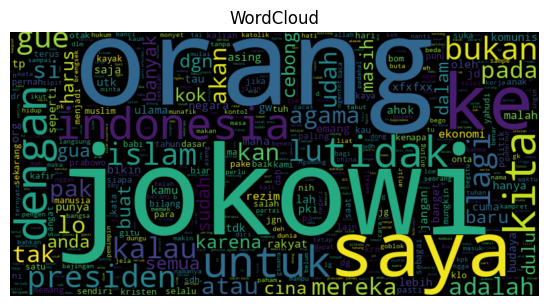

In [198]:
#tampilkan wordcloud
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud')
plt.show()

In [199]:
#menghitung frekuensi kata
tokens = df.split()
word_counts = Counter(tokens)
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

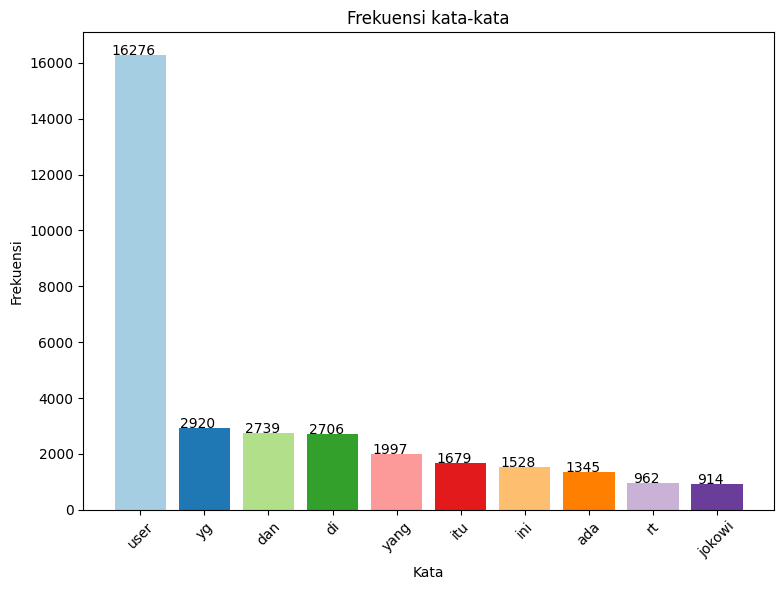

In [200]:
#tampilkan barchart frekuensi kata
plt.figure(figsize=(15,6))
plt.subplot(1,2,2)
colors = plt.cm.Paired(range(len(word)))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.title("Frekuensi kata-kata")
plt.xticks(rotation=45)

#tambahkan label frekuensi di atas stiap bar
for bar, num in zip(bars,count):
  plt.text(bar.get_x()+bar.get_width()/2-0.1, num + 1, str(num), fontsize=10, color='black', ha='center')

plt.tight_layout()
plt.show(10)